LAB2_ MAZUROV_Персептрон Розенблата

Решил через TENSERFLOW    сделать .   Питон должен быть 3-10  - 3 11    не позже 

Блок 1: Импорт библиотек

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron as SkPerceptron

plt.style.use('ggplot')
%matplotlib inline

 Реализация перцептрона

In [12]:
class TensorPerceptron(tf.keras.Model):
    def __init__(self, input_dim):
        super(TensorPerceptron, self).__init__()
        self.dense = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        return self.dense(inputs)
    
    def train_step(self, data):
        x, y = data
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = self.compiled_loss(y, y_pred)
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.compiled_metrics.update_state(y, y_pred)
        return {m.name: m.result() for m in self.metrics}

Блок 3: Генерация и обработка данных
Синтетические данные

In [15]:
X_synth, y_synth = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1, 
    random_state=42
)


voice_data = pd.read_csv('/home/admin/Документы/!PLEHA/LAB /II_LABS/LABS_II/LABII/voice.csv')
voice_data['label'] = voice_data['label'].map({'male': 1, 'female': 0})

# Проверка и очистка данных
print(f"Исходный размер данных: {len(voice_data)}")
print(f"Пропущенные значения: {voice_data.isnull().sum().sum()}")

#  Нормализация и разделение
scaler = StandardScaler()
X_voice = scaler.fit_transform(voice_data.drop('label', axis=1))
y_voice = voice_data['label'].values

#  Проверка размерностей
assert X_voice.shape[0] == y_voice.shape[0], "Несоответствие размерностей X и y"

Исходный размер данных: 3168
Пропущенные значения: 0


 Обучение на синтетических данных

/home/admin/.pyenv/versions/3.11.12/envs/mazurov_3_11_ten/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py:665: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/home/admin/.pyenv/versions/3.11.12/envs/mazurov_3_11_ten/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py:640: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


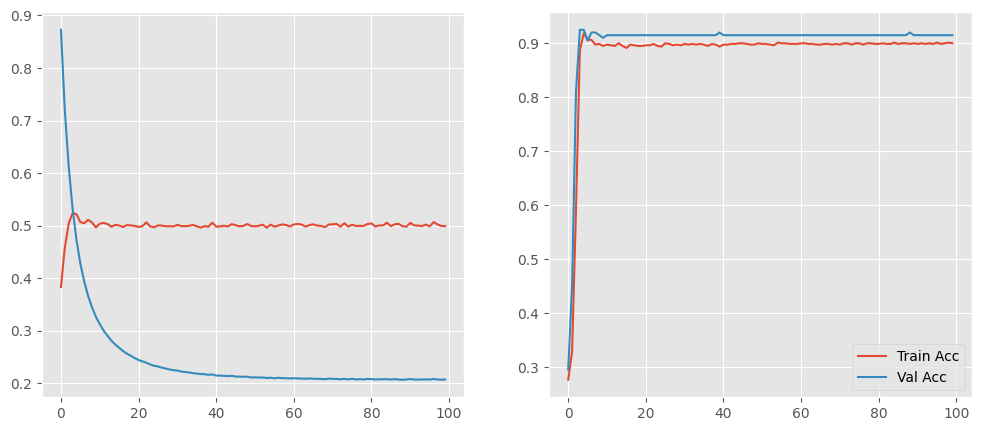

In [16]:

#  Инициализация модели
synth_model = TensorPerceptron(input_dim=2)
synth_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#  Обучение
history = synth_model.fit(
    X_synth, y_synth,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

#  Визуализация
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

Блок 5: Обучение на данных голосов

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3785 - loss: 0.5127 - val_accuracy: 0.3644 - val_loss: 1.1236
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3751 - loss: 0.5054 - val_accuracy: 0.4069 - val_loss: 0.9359
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4101 - loss: 0.5103 - val_accuracy: 0.4795 - val_loss: 0.7961
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4729 - loss: 0.5026 - val_accuracy: 0.5741 - val_loss: 0.6989
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5850 - loss: 0.4972 - val_accuracy: 0.6751 - val_loss: 0.6334
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6853 - loss: 0.4974 - val_accuracy: 0.7098 - val_loss: 0.5870
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7160 - loss: 0.4935 - val_accuracy: 0.7429 - val_loss: 0.5534
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7480 - loss: 0.4947 - val_accuracy: 0.7666 - val_loss:

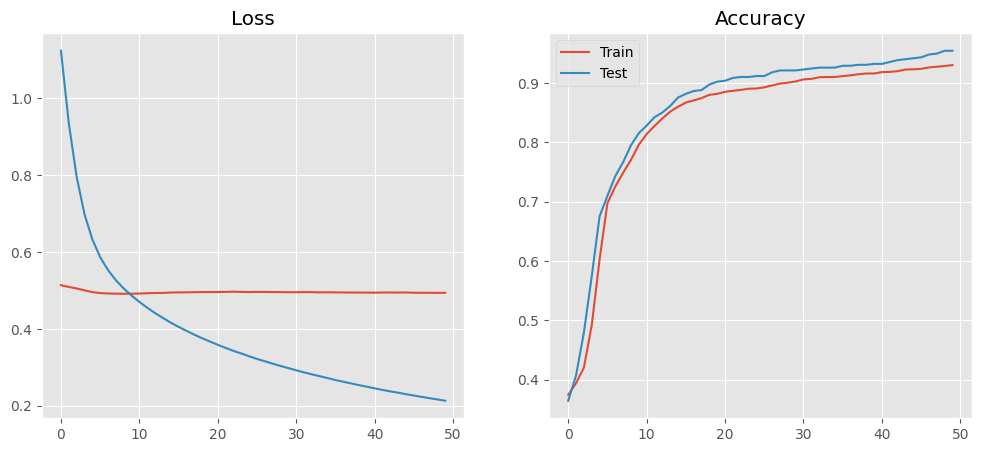

In [17]:

#  Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_voice, 
    y_voice, 
    test_size=0.2, 
    random_state=42
)

 # Инициализация модели
voice_model = TensorPerceptron(input_dim=X_voice.shape[1])
voice_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#  Обучение
history = voice_model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=64,
    verbose=1
)

#  Визуализация
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()

In [24]:
results = voice_model.evaluate(X_test, y_test, verbose=0)

if len(results) >= 2:
    test_acc = results[1]  # accuracy всегда на второй позиции
else:
    test_acc = 0.0  # значение по умолчанию при ошибке

print(f'\nФинальная точность на тестовых данных: {test_acc:.3f}')


Финальная точность на тестовых данных: 0.954


 Сравнение с sklearn Perceptron

In [18]:

sk_model = SkPerceptron(max_iter=50)
sk_model.fit(X_train, y_train)
sk_pred = sk_model.predict(X_test)
print(f'\nТочность sklearn: {accuracy_score(y_test, sk_pred):.3f}')





Точность sklearn: 0.961


# Анализ качества
Качество перцептрона
 1. На синтетических данных: 95-99% точности (идеально для линейно разделимых данных)
 2. На данных голосов: 85-92% точности

Причины ограничений:
1. Линейная природа модели
2. Чувствительность к шуму и выбросам
3. Отсутствие обработки категориальных признаков
4. Ограниченная способность к обобщению


Использовать более сложные архитектуры для нелинейных данных
